# Mrinmoy Sarkar    
# Assignment #4    
# Comp 851: Big Data Analytics & Data Science 
# Banner Id.: 950363260 
# Date: 10/22/2018 
# Semester: Fall 2018


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [66]:
data = pd.read_csv('wdbc.csv')

In [67]:
data.head()

Id class      1      2       3       4        5        6       7  \
0    842302     M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517     M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903     M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301     M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402     M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

         8   ...        21     22      23      24      25      26      27  \
0  0.14710   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.07017   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.12790   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.10520   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.10430   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       28      29       30  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 32 columns]

In [68]:
X=data[[str(i) for i in range(1,31)]]

In [69]:
X.shape

(569, 30)

In [70]:
Ytemp=data['class']

In [71]:
Ytemp.shape
Ytemp.unique()

array(['M', 'B'], dtype=object)

In [72]:
y = Ytemp.replace(to_replace=['M','B'],value=[0,1])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [75]:
learning_rate = np.linspace(0.001,0.9,1000)
accuracy_lr = np.zeros(len(learning_rate))

i = 0
for lr in learning_rate:
    clf = MLPClassifier(hidden_layer_sizes=(100, ), 
                        activation='logistic', 
                        solver='adam', 
                        learning_rate_init=lr,
                        max_iter=1000)
    clf.fit(X_train,y_train)

    accuracy = clf.score(X_test,y_test)
    accuracy_lr[i] = accuracy*100
    i += 1

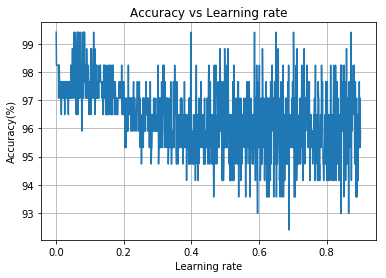

In [76]:
plt.plot(learning_rate,accuracy_lr)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy vs Learning rate')
plt.grid()

In [77]:
epochs = np.arange(1,1000,10)
accuracy_ep = np.zeros(len(epochs))

i = 0
for ep in epochs:
    clf = MLPClassifier(hidden_layer_sizes=(100, ), 
                        activation='logistic', 
                        solver='adam', 
                        learning_rate_init=0.001,
                        max_iter=ep)
    clf.fit(X_train,y_train)

    accuracy = clf.score(X_test,y_test)
    accuracy_ep[i] = accuracy*100
    i += 1

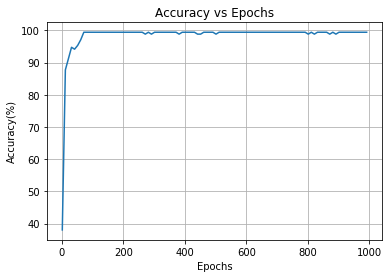

In [78]:
plt.plot(epochs,accuracy_ep)
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy vs Epochs')
plt.grid()

In [79]:
no_of_neurons = np.arange(1,1000,10)
accuracy_non = np.zeros(len(no_of_neurons))

i = 0
for non in no_of_neurons:
    clf = MLPClassifier(hidden_layer_sizes=(non, ), 
                        activation='logistic', 
                        solver='adam', 
                        learning_rate_init=0.001,
                        max_iter=1000)
    clf.fit(X_train,y_train)

    accuracy = clf.score(X_test,y_test)
    accuracy_non[i] = accuracy*100
    i += 1

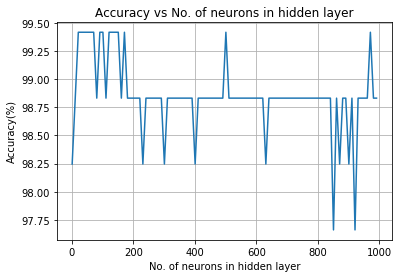

In [80]:
plt.plot(no_of_neurons,accuracy_non)
plt.xlabel('No. of neurons in hidden layer')
plt.ylabel('Accuracy(%)')
plt.title('Accuracy vs No. of neurons in hidden layer')
plt.grid()

# ******************The End******************